**LABORATORIO --> GUARDANDO PESOS Y EXPORT CON ONNX **

* Dataset:https://drive.google.com/file/d/1ANlgZFq1lauAchmDRPGUaBJAe2G5Q2qK/view?usp=sharing
* repositorio github:https://github.com/R1mber/SIS-330/laboratorios\laboratorio_3
* DenseNet creada 2016 ultima actualizacion 2018
densenet121

torchvision.models.densenet121(pretrained: bool = False, progress: bool = True, **kwargs: Any) → torchvision.*models*.densenet.DenseNet

Densenet-121 model from “Densely Connected Convolutional Networks”. The required minimum input size of the model is 29x29.

***Parametross***
* pretrained (bool) – If True, returns a model pre-trained on ImageNet
* progress (bool) – If True, displays a progress bar of the download to stderr
* memory_efficient (bool) – but slower. Default: False. See “paper”

In [ ]:
import os
import torch
import random
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from PIL import Image
from skimage import io

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/inteligencia_artificial/ia2/final/trigo.zip", "trigo.zip")


'trigo.zip'

In [ ]:
shutil.unpack_archive("trigo.zip")

In [ ]:
path_train = '/content/trigo/train/'
path_test = '/content/trigo/test/'
directorios_train = os.listdir(path_train)
directorios_test = os.listdir(path_test)
directorios_test , directorios_train

(['grano-duro-vitreo', 'trigo-duro-con-almidon'],
 ['grano-duro-vitreo', 'trigo-duro-con-almidon'])

In [ ]:
labels_def = {'trigo-duro-con-almidon':0, 'grano-duro-vitreo':1}

In [ ]:
def loadImages(path, directorio):
    labels_ = []
    images_ = []
    for d in directorio:
        imagenes = os.listdir(path + d)
        for i in imagenes:
            imgPath2 = path + d + '/' + i
            images_.append(imgPath2)
            labels_.append(labels_def[d])
    return images_, labels_

def getText(label):
    for key in labels_def:
      if labels_def[key] == label:
        return key

In [ ]:
imgs , labels = loadImages(path_train,directorios_train)
imgs_test , labels_test = loadImages(path_test,directorios_test)

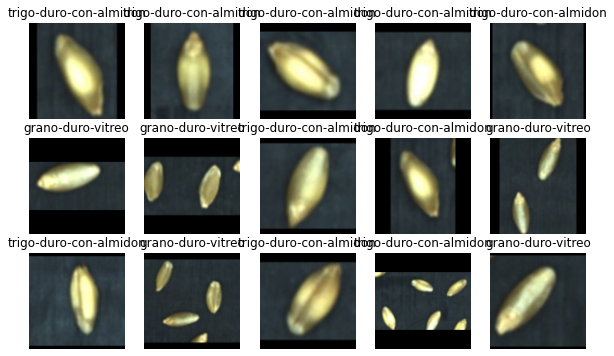

In [ ]:

fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(imgs)-1)
    img = io.imread(imgs[ix])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(getText(labels[ix]))
plt.show()

In [ ]:
train_imgs = imgs
test_imgs = imgs_test
train_labels = labels
test_labels = labels_test

len(train_imgs), len(test_imgs)

(390, 10)

In [ ]:
class Dataset(torch.utils.data.Dataset):
    # constructor
    def __init__(self, X, Y):
        self.X = X #torch.from_numpy(X).float().cuda()
        self.Y = Y #torch.from_numpy(Y).long().cuda()
    # devolvemos el número de datos en el dataset
    def __len__(self):
        return len(self.X)
    # devolvemos el elemento `ix` del dataset
    def __getitem__(self, ix):
        img1 = Image.open(self.X[ix])
        new_img = img1.resize((60,60))
        #normalizamos la imagen 
        npImage = np.array(new_img)
        #return self.X[ix], self.Y[ix]
        #img = self.trans(image=img)["image"]
        return torch.from_numpy(npImage / 255.).float().permute(2,0,1), torch.tensor(self.Y[ix])

In [ ]:
dataset = {
    'train': Dataset(train_imgs, train_labels), 
    'test': Dataset(test_imgs, test_labels)
}
len(dataset['train']), len(dataset['test']),

(390, 10)

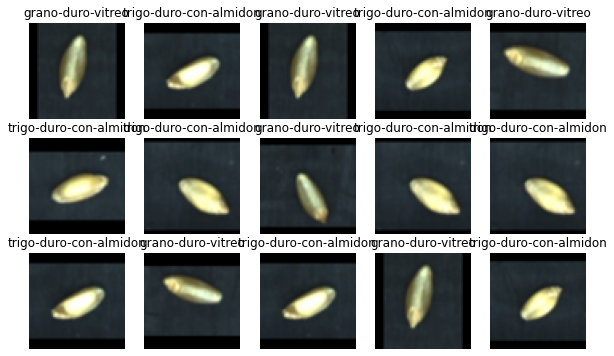

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['test'])-1)
    img, lab = dataset['test'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(getText(lab))
    #ax.set_title(classes[lab])
plt.show()

In [ ]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=65, shuffle=True, pin_memory=True), 
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=50, shuffle=False)
}

x_train, y_train = next(iter(dataloader['train']))

In [ ]:
x_train.shape ,x_train[0].shape

(torch.Size([65, 3, 60, 60]), torch.Size([3, 60, 60]))

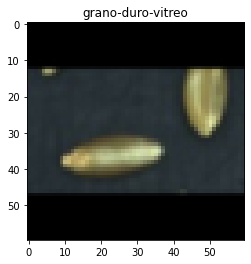

In [ ]:
rand = random.randint(0, len(x_train))
img_perm=x_train[rand].permute(1, 2,0)
plt.imshow(img_perm)
plt.title(getText(y_train[rand]))
plt.show()

In [ ]:
densenet = torchvision.models.densenet201()
densenet

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
class Model(torch.nn.Module):
  def __init__(self, n_outputs=2, pretrained=False, freeze=False):
    super().__init__()
    # descargamos resnet
    densenet = torchvision.models.densenet201(pretrained=pretrained)
    # nos quedamos con todas las capas menos la última
    self.densenet = torch.nn.Sequential(*list(densenet.children())[:-1])
    #print(self.densenet)
    if freeze:
      for param in self.densenet.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(1920, 2)
    print(self.fc)
  def forward(self, x):
    x = self.densenet(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    
    return x

  def unfreeze(self):
    for param in self.densenet.parameters():
        param.requires_grad=True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
#torch.cuda.empty_cache()
model = Model()
outputs = model(torch.randn(64, 3, 60, 60))
outputs.shape

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Linear(in_features=1920, out_features=2, bias=True)


torch.Size([64, 2])

In [ ]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

**Entrenando desde cero**

In [ ]:
model_1 = Model()
fit(model, dataloader, epochs=6)

Linear(in_features=1920, out_features=2, bias=True)


val_loss 0.76218 val_acc 0.50000: 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]


Epoch 1/6 loss 0.59978 val_loss 0.76218 acc 0.70000 val_acc 0.50000


val_loss 0.83869 val_acc 0.50000: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]


Epoch 2/6 loss 0.38708 val_loss 0.83869 acc 0.83846 val_acc 0.50000


val_loss 0.97823 val_acc 0.50000: 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]


Epoch 3/6 loss 0.30490 val_loss 0.97823 acc 0.88974 val_acc 0.50000


val_loss 0.93009 val_acc 0.50000: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Epoch 4/6 loss 0.22097 val_loss 0.93009 acc 0.92564 val_acc 0.50000


val_loss 0.59732 val_acc 0.50000: 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]


Epoch 5/6 loss 0.15101 val_loss 0.59732 acc 0.95128 val_acc 0.50000


val_loss 0.47560 val_acc 0.70000: 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

Epoch 6/6 loss 0.10626 val_loss 0.47560 acc 0.98462 val_acc 0.70000


__Transfer Learning__




In [ ]:
model_tl = Model(pretrained=True, freeze=True)
fit(model, dataloader)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

Linear(in_features=1920, out_features=2, bias=True)


val_loss 0.20523 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Epoch 1/5 loss 0.06881 val_loss 0.20523 acc 0.99231 val_acc 1.00000


val_loss 0.09156 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]


Epoch 2/5 loss 0.04410 val_loss 0.09156 acc 1.00000 val_acc 1.00000


val_loss 0.04342 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]


Epoch 3/5 loss 0.02665 val_loss 0.04342 acc 1.00000 val_acc 1.00000


val_loss 0.05052 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]


Epoch 4/5 loss 0.02155 val_loss 0.05052 acc 1.00000 val_acc 1.00000


val_loss 0.02299 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

Epoch 5/5 loss 0.01563 val_loss 0.02299 acc 1.00000 val_acc 1.00000


**fine tunning**

In [ ]:
model_ft = Model(pretrained=True, freeze=False)
fit(model, dataloader)

Linear(in_features=1920, out_features=2, bias=True)


val_loss 0.01213 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Epoch 1/5 loss 0.02151 val_loss 0.01213 acc 0.99744 val_acc 1.00000


val_loss 0.02039 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


Epoch 2/5 loss 0.01432 val_loss 0.02039 acc 1.00000 val_acc 1.00000


val_loss 0.01836 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]


Epoch 3/5 loss 0.01012 val_loss 0.01836 acc 1.00000 val_acc 1.00000


val_loss 0.01856 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]


Epoch 4/5 loss 0.00969 val_loss 0.01856 acc 1.00000 val_acc 1.00000


val_loss 0.01611 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

Epoch 5/5 loss 0.00672 val_loss 0.01611 acc 1.00000 val_acc 1.00000


In [ ]:
model_modif = Model(pretrained=True, freeze=True)
fit(model, dataloader)
model.unfreeze()
fit(model, dataloader, lr=1e-4)

Linear(in_features=1920, out_features=2, bias=True)


val_loss 0.01159 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Epoch 1/5 loss 0.00689 val_loss 0.01159 acc 1.00000 val_acc 1.00000


val_loss 0.00845 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


Epoch 2/5 loss 0.01189 val_loss 0.00845 acc 1.00000 val_acc 1.00000


val_loss 0.00815 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]


Epoch 3/5 loss 0.00503 val_loss 0.00815 acc 1.00000 val_acc 1.00000


val_loss 0.00708 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]


Epoch 4/5 loss 0.00554 val_loss 0.00708 acc 1.00000 val_acc 1.00000


val_loss 0.01796 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]


Epoch 5/5 loss 0.01416 val_loss 0.01796 acc 1.00000 val_acc 1.00000


val_loss 0.01316 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]


Epoch 1/5 loss 0.00491 val_loss 0.01316 acc 1.00000 val_acc 1.00000


val_loss 0.01244 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]


Epoch 2/5 loss 0.00582 val_loss 0.01244 acc 1.00000 val_acc 1.00000


val_loss 0.01048 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]


Epoch 3/5 loss 0.01065 val_loss 0.01048 acc 1.00000 val_acc 1.00000


val_loss 0.01024 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]


Epoch 4/5 loss 0.00819 val_loss 0.01024 acc 1.00000 val_acc 1.00000


val_loss 0.01018 val_acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

Epoch 5/5 loss 0.00419 val_loss 0.01018 acc 1.00000 val_acc 1.00000


In [ ]:
torch.save(model_ft.state_dict(), 'saved_weights_ft.pt')
path = 'saved_weights_ft.pt'


In [ ]:
model_ft.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
"""image_al = Image.open('almidon.jpg')
new_img_alm = image_al.resize((60,60))
npImage_1 = np.array(new_img_alm)

image_vit = Image.open('/content/vitreo.jpg')
new_img_vit = image_al.resize((60,60))
npImage_2 = np.array(new_img_alm)

imagen_01 =  torch.from_numpy(npImage_1 / 255.).float().permute(2,0,1)
imagen_02 =  torch.from_numpy(npImage_2 / 255.).float().permute(2,0,1)"""

"image_al = Image.open('almidon.jpg')\nnew_img_alm = image_al.resize((60,60))\nnpImage_1 = np.array(new_img_alm)\n\nimage_vit = Image.open('/content/vitreo.jpg')\nnew_img_vit = image_al.resize((60,60))\nnpImage_2 = np.array(new_img_alm)\n\nimagen_01 =  torch.from_numpy(npImage_1 / 255.).float().permute(2,0,1)\nimagen_02 =  torch.from_numpy(npImage_2 / 255.).float().permute(2,0,1)"

In [ ]:
"""model_ft.eval()
with torch.no_grad():
    output = model(imagen_01.unsqueeze(0).to(device))[0]
    pred_mask = torch.argmax(output, axis=0)
pred_mask"""

'model_ft.eval()\nwith torch.no_grad():\n    output = model(imagen_01.unsqueeze(0).to(device))[0]\n    pred_mask = torch.argmax(output, axis=0)\npred_mask'

In [ ]:
#model_ft.eval()
#with torch.no_grad():
#    output1 = model(imagen_02.unsqueeze(0).to(device))[0]
#    pred_2 = torch.argmax(output1, axis=0)
#pred_2

# **onnx** exportando modelo

In [ ]:
!pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.4 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 


In [ ]:
x = torch.rand(20, 3, 60, 60)
y = model.cpu()(x)

# exportamos el modelo
torch.onnx.export(model,                     # el modelo
                  x,                         # un ejemplo del input
                  "model.onnx",              # el nombre del archivo para guardar el modelo
                  export_params=True,        # guardar los pesos de la red
                  opset_version=10,          # versión de ONNX
                  do_constant_folding=True,  # optimizaciones
                  input_names = ['input'],   # nombre de los inputs
                  output_names = ['output'], # nombre de los outputs
                  dynamic_axes={'input' : {0 : 'batch_size'},    # ejes con longitud variable (para poder usar diferentes tamaños de batch)
                                'output' : {0 : 'batch_size'}})

In [ ]:
import onnxruntime

def onnx_evaluate(model, dataloader): 
    # cargarmos el modelo
    ort_session = onnxruntime.InferenceSession(model)
    bar = tqdm(dataloader['test'])
    acc = []
    with torch.no_grad():
        for batch in bar:
            X, y = batch
            X, y = X.numpy(), y.numpy()
            # generamos los inputs
            ort_inputs = {ort_session.get_inputs()[0].name: X}
            # extraemos los outputs
            ort_outs = ort_session.run(None, ort_inputs)[0]
            acc.append((y == np.argmax(ort_outs, axis=1)).mean())
            bar.set_description(f"acc {np.mean(acc):.5f}")

In [ ]:
onnx_evaluate("model.onnx", dataloader)

acc 1.00000: 100%|██████████| 1/1 [00:00<00:00,  7.20it/s]
